## Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Data Retrival 

In [2]:
df= pd.read_csv("Obesity-level-prediction-dataset.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.shape

(2111, 17)

In [4]:
# Renaming the feature to make them understandable
df = df.rename(columns={
    "Gender": "gender",
    "Age": "age",
    "Height": "height",
    "Weight": "weight",
    "family_history_with_overweight": "fam_hist_overwt",
    "FAVC": "high_cal_food",
    "FCVC": "veg_freq",
    "NCP": "meals_per_day",
    "CAEC": "snack_freq",
    "SMOKE": "smoke",
    "CH2O": "water_intake",
    "SCC": "cal_monitor",
    "FAF": "phys_act",
    "TUE": "tech_time",
    "CALC": "alcohol",
    "MTRANS": "transport",
    "NObeyesdad": "obesity_level"
})


## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           2111 non-null   object 
 1   age              2111 non-null   float64
 2   height           2111 non-null   float64
 3   weight           2111 non-null   float64
 4   fam_hist_overwt  2111 non-null   object 
 5   high_cal_food    2111 non-null   object 
 6   veg_freq         2111 non-null   float64
 7   meals_per_day    2111 non-null   float64
 8   snack_freq       2111 non-null   object 
 9   smoke            2111 non-null   object 
 10  water_intake     2111 non-null   float64
 11  cal_monitor      2111 non-null   object 
 12  phys_act         2111 non-null   float64
 13  tech_time        2111 non-null   float64
 14  alcohol          2111 non-null   object 
 15  transport        2111 non-null   object 
 16  obesity_level    2111 non-null   object 
dtypes: float64(8),

In [6]:
df.isnull().sum()

gender             0
age                0
height             0
weight             0
fam_hist_overwt    0
high_cal_food      0
veg_freq           0
meals_per_day      0
snack_freq         0
smoke              0
water_intake       0
cal_monitor        0
phys_act           0
tech_time          0
alcohol            0
transport          0
obesity_level      0
dtype: int64

Our dataset have 17 features(8 numerical, 9 categorical) with 2111 entries and have no null values

In [7]:
df.describe()

,age,height,weight,veg_freq,meals_per_day,water_intake,phys_act,tech_time
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
# Cheking skeweness
df[['age','height','weight','veg_freq','meals_per_day','water_intake','phys_act','tech_time']].skew()

age              1.529100
height          -0.012855
weight           0.255410
veg_freq        -0.432906
meals_per_day   -1.107097
water_intake    -0.104912
phys_act         0.498490
tech_time        0.618502
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D object at 0x000002560A516D50>, <matplotlib.lines.Line2D object at 0x000002560A516E90>], 'caps': [<matplotlib.lines.Line2D object at 0x000002560A516FD0>, <matplotlib.lines.Line2D object at 0x000002560A517110>], 'boxes': [<matplotlib.lines.Line2D object at 0x000002560A42EAD0>], 'medians': [<matplotlib.lines.Line2D object at 0x000002560A517250>], 'fliers': [<matplotlib.lines.Line2D object at 0x000002560A517390>], 'means': []}


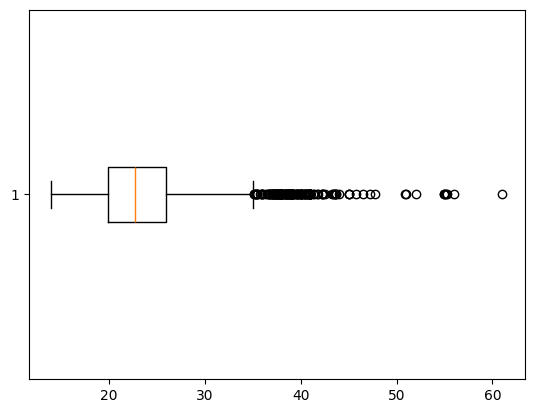

In [9]:
print(plt.boxplot(df['age'],vert=False))

Some features have outliers which we address these outliers in preprocessing

## Correlation Analysis
Checking the multicollinearity and correaltion of features and target to identify redundant and important features

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['obesity_level_num'] = le.fit_transform(df['obesity_level'])

In [11]:
print(df['obesity_level_num'].corr(df['phys_act']))

-0.1295643077268506


In [12]:
df_num = df.select_dtypes(include='number')

In [13]:
df_num.corr()

,age,height,weight,veg_freq,meals_per_day,water_intake,phys_act,tech_time,obesity_level_num
age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931,0.236170
height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912,0.038986
weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561,0.387643
veg_freq,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135,0.018522
meals_per_day,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326,-0.092616
water_intake,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965,0.108868
phys_act,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562,-0.129564
tech_time,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000,-0.069448
obesity_level_num,0.236170,0.038986,0.387643,0.018522,-0.092616,0.108868,-0.129564,-0.069448,1.000000


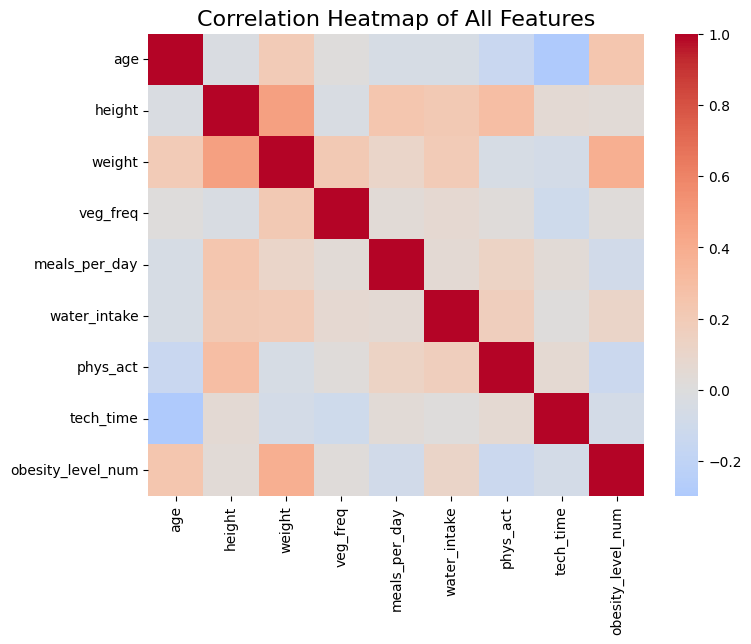

In [14]:
corr = df_num.corr()

# Set figure size
plt.figure(figsize=(8,6))

# Draw heatmap
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)

plt.title("Correlation Heatmap of All Features", fontsize=16)
plt.show()

### Checking the Target Distribution

In [15]:
df['obesity_level'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [16]:
df['obesity_level'].value_counts()

obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

<Axes: xlabel='obesity_level', ylabel='count'>

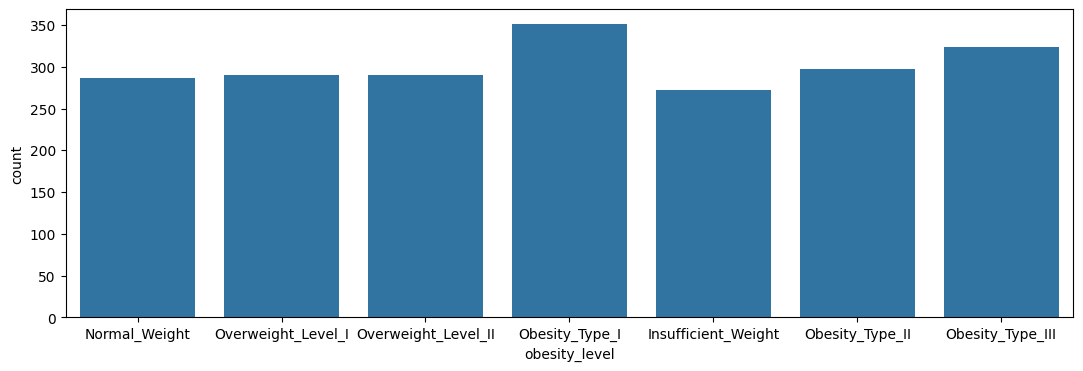

In [17]:
plt.figure(figsize=(13,4))
sns.countplot(x=df['obesity_level'],data=df)

In [18]:
df.columns

Index(['gender', 'age', 'height', 'weight', 'fam_hist_overwt', 'high_cal_food',
       'veg_freq', 'meals_per_day', 'snack_freq', 'smoke', 'water_intake',
       'cal_monitor', 'phys_act', 'tech_time', 'alcohol', 'transport',
       'obesity_level', 'obesity_level_num'],
      dtype='object')

In [19]:
# Handling Categorical features
df['cal_monitor'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
df['high_cal_food'].value_counts()

high_cal_food
yes    1866
no      245
Name: count, dtype: int64

<Axes: >

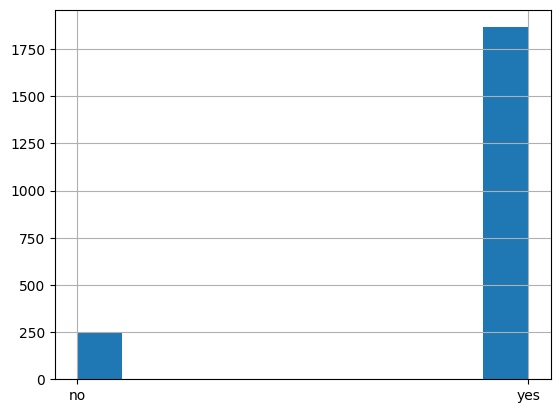

In [21]:
df['high_cal_food'].hist()

In [22]:
df['transport'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [23]:
df['transport'].value_counts()

transport
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

<Axes: xlabel='transport', ylabel='count'>

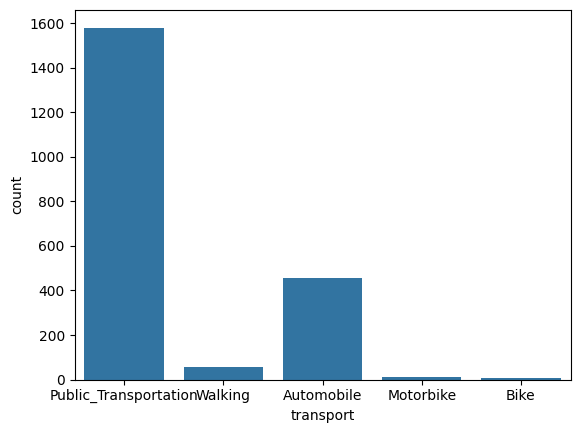

In [24]:
sns.countplot(x=df['transport'],data=df)

This skew is worth addressing.

## Data Visulization

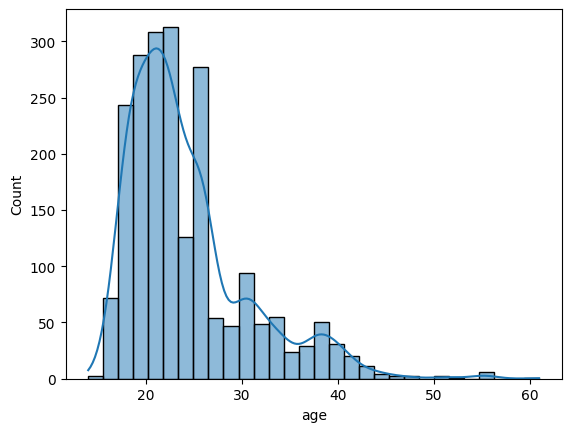

In [25]:
sns.histplot(df['age'], bins=30, kde=True)
plt.show()

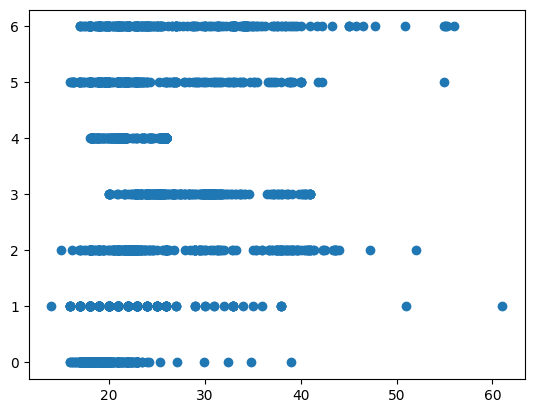

In [26]:
# Realation of Target with age 
plt.scatter(df['age'],df['obesity_level_num'])

## Data Preprocessing

In [27]:
df.columns

Index(['gender', 'age', 'height', 'weight', 'fam_hist_overwt', 'high_cal_food',
       'veg_freq', 'meals_per_day', 'snack_freq', 'smoke', 'water_intake',
       'cal_monitor', 'phys_act', 'tech_time', 'alcohol', 'transport',
       'obesity_level', 'obesity_level_num'],
      dtype='object')

In [28]:
# Droping extra coloumns
df = df.drop(columns=['obesity_level'])

In [29]:
## Checking the effect of log transform on skewness
df_temp = df_num.copy()
df_temp_lg=np.log(df_temp)

In [30]:
df_temp_lg['age'].skew()

np.float64(0.8677366524148575)

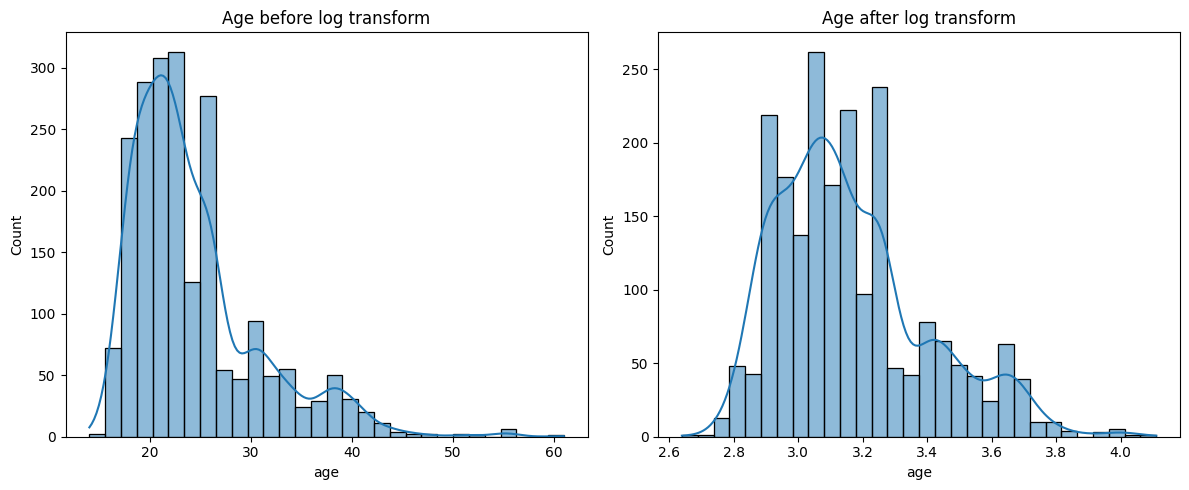

In [31]:
plt.figure(figsize=(12,5))

# Before log transform
plt.subplot(1,2,1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age before log transform")

# After log transform
plt.subplot(1,2,2)
sns.histplot(df_temp_lg['age'], bins=30, kde=True)
plt.title("Age after log transform")

plt.tight_layout()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

In [33]:
X = df.drop(columns=['obesity_level_num'])
y = df['obesity_level_num']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Model Training

In [35]:
# Categorical and numeric features
cat_features = ['gender', 'fam_hist_overwt', 'high_cal_food', 'snack_freq',
                'smoke', 'cal_monitor', 'alcohol', 'transport']

num_features = ['age', 'height', 'weight', 'veg_freq', 
                'meals_per_day', 'water_intake', 'phys_act', 'tech_time']


In [36]:
num_transformer = Pipeline([
    ("log", FunctionTransformer(np.log1p, validate=False)),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)


In [37]:
model_ovo = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", OneVsOneClassifier(LogisticRegression(max_iter=1000)))
])

In [38]:
model_ovo.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Model Evaluation

In [39]:
y_pred = model_ovo.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9314420803782506


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       0.86      0.83      0.84        58
           2       0.97      0.93      0.95        70
           3       0.97      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.83      0.84      0.84        58
           6       0.93      0.95      0.94        58

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



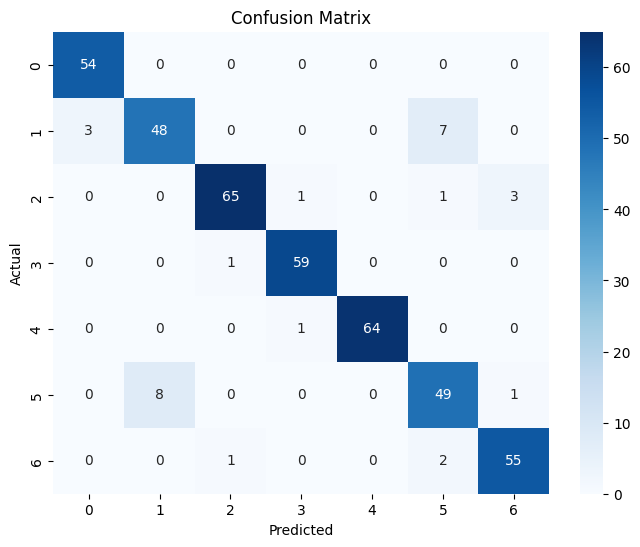

<Figure size 640x480 with 0 Axes>

In [42]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Conclusion
Built a robust ML pipeline to predict 7 obesity levels from lifestyle and health features. Logistic Regression with OvO strategy **achieved ~93% accuracy** and strong F1 across classes, with minor confusion only between neighboring weight categories. This project shows the power of clean EDA + preprocessing + pipelines in delivering reliable, reproducible models. Future work: tree-based models (RF, XGBoost) and ROC-AUC benchmarking for deeper insights.